In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1. Write a code to import  Dataframe in Python

In [14]:
# I have seperated this table in a separate csv file that contains only the below table
df = pd.read_csv('python_case_study.csv')
df

,Emp ID,Region,Supplier Name,Harmonized Supplier Name,Department,Month,Year,Sales,Discounts,Date,%Sales,% Discount
0,10001,East,Dell,NaN,5255-Data/Connectivity Sales,Jan,FY13,"100,000","25,000",24-01-2023,NaN,NaN
1,10002,East,Dell Inc,NaN,5256-Sales Mgt & Support,Jan,FY13,"150,000","30,000",1/1/2023,NaN,NaN
2,10003,East,Dell Ltd,NaN,5257-Auto Sales,Jan,FY13,"200,000","35,000",1/8/2023,NaN,NaN
3,10001,East,ABBGroup,NaN,5255-Data/Connectivity Sales,Jan,FY13,"100,000","25,000",1/28/2023,NaN,NaN
4,10002,East,Google India,NaN,5256-Sales Mgt & Support,Jan,FY13,"150,000","30,000",1/21/2023,NaN,NaN
5,10003,East,DHL,NaN,5257-Auto Sales,Jan,FY13,"200,000","35,000",1/23/2023,NaN,NaN
6,10005,West,Google USA,NaN,5259-Sales Channel,Jan,FY13,"300,000","45,000",1/14/2023,NaN,NaN
7,10007,West,DHL Ltd,NaN,5263-Sales Support,Jan,FY13,"400,000","55,000",28-01-2023,NaN,NaN
8,10004,East,ABB,NaN,5258-IAP Sales,Jan,FY13,"250,000","40,000",1/28/2023,NaN,NaN
9,10005,West,Office Supplies,NaN,5259-Sales Channel,Jan,FY13,"300,000","45,000",1/21/2023,NaN,NaN


2. Write the code to find unique Name in above table

In [15]:
# In the table, there was only Supplier Name column related to this question 
# as Harmonized Supplier Name column is null
df['Supplier Name'].unique()

array(['Dell', 'Dell Inc', 'Dell Ltd', 'ABBGroup', 'Google India', 'DHL',
       'Google USA', 'DHL Ltd', 'ABB', 'Office Supplies', 'Dell USA',
       'Ericson', 'Ericson USA'], dtype=object)

3. Write the code to find top 3 sales with Name and Department

In [16]:
df.groupby(['Supplier Name', 'Department'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(3)

,Supplier Name,Department,Sales
9,Ericson USA,5264-ARD Sales,"450,000"
3,DHL Ltd,5263-Sales Support,"400,000"
8,Ericson,5263-Sales Support,"400,000"


4. Replace "DeRusha, Joe" Name with "John" in D Column

In [10]:
# So we didn't have Name column in the table but if we had then the code to replace would be
df['Name'] = df['Name'].replace('DeRusha, Joe', 'John')

5. Plot top 5 sales for each Region

In [17]:
# Sales column was in object type so it needed to be converted to numeric
df['Sales'] = df['Sales'].str.replace(',', '').astype(float)

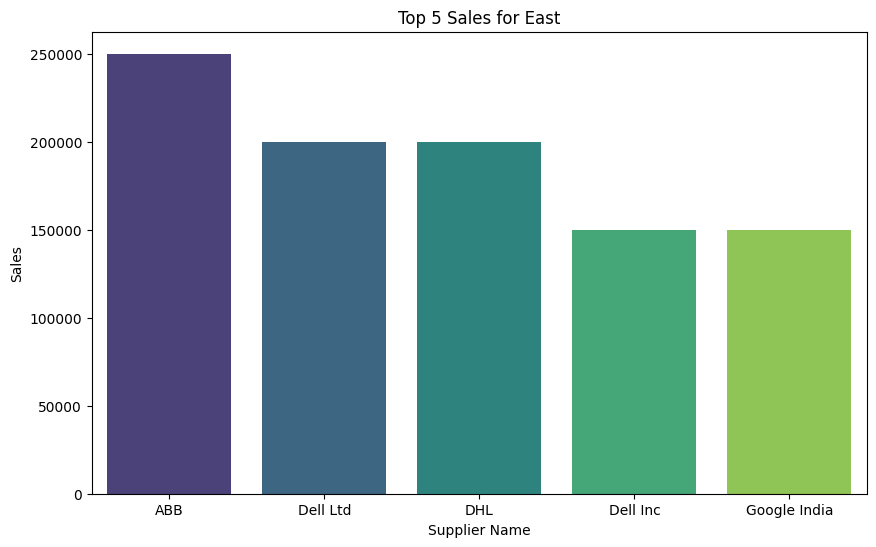

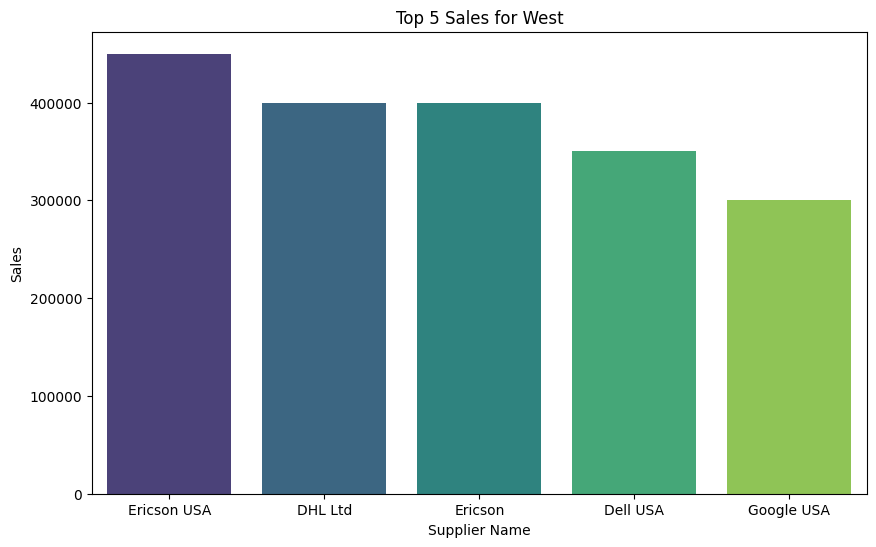

In [20]:
top_5_sales_per_region = df.groupby('Region').apply(lambda x: x.nlargest(5, 'Sales')).reset_index(drop=True)

for region in top_5_sales_per_region['Region'].unique():
    region_data = top_5_sales_per_region[top_5_sales_per_region['Region'] == region]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=region_data['Supplier Name'], y=region_data['Sales'], palette='viridis')
    plt.title(f'Top 5 Sales for {region}')
    plt.xlabel('Supplier Name')
    plt.ylabel('Sales')
    plt.show()

6. Plot the chart -> percentage contribution of sales for Unique Name

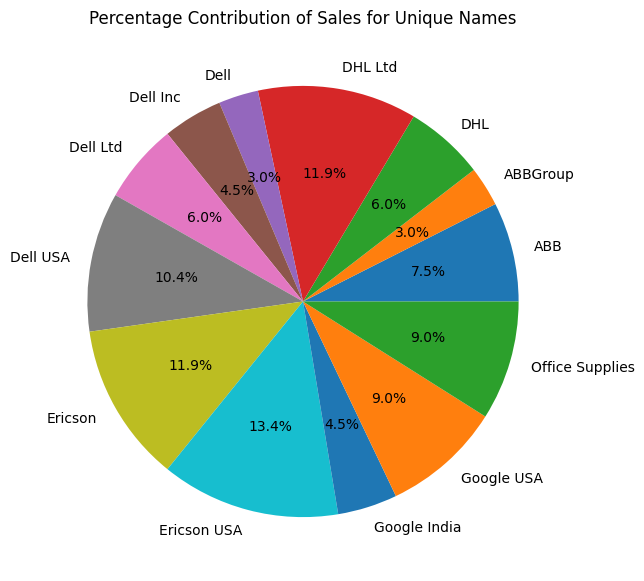

In [24]:
sales_by_unique_name = df.groupby('Supplier Name')['Sales'].sum()

sales_by_unique_name.plot.pie(autopct='%1.1f%%', figsize=(10, 7), title='Percentage Contribution of Sales for Unique Names')
plt.ylabel('')
plt.show()

7. Define the logic based on similarity to pupolate Harmonized supplier name in above table</br>
E.g. Dell, Dell Inc, Dell Ltd and Dell USA will have same harmonized name as Dell Similarly Google India and Google USA willl have same name as Google

In [25]:
df['Supplier Name'].values

array(['Dell', 'Dell Inc', 'Dell Ltd', 'ABBGroup', 'Google India', 'DHL',
       'Google USA', 'DHL Ltd', 'ABB', 'Office Supplies', 'Dell USA',
       'Ericson', 'Ericson USA'], dtype=object)

In [26]:
def harmonize_name(name):
    harmonization_map = {
        'Dell': 'Dell',
        'Dell Inc': 'Dell',
        'Dell Ltd': 'Dell',
        'Dell USA': 'Dell',
        'ABB': 'ABB',
        'ABBGroup': 'ABB',
        'Google': 'Google',
        'Google India': 'Google',
        'Google USA': 'Google',
        'DHL': 'DHL',
        'DHL Ltd': 'DHL',
        'Office Supplies': 'Office Supplies',
        'Ericson': 'Ericson',
        'Ericson USA': 'Ericson'
    }
    for key in harmonization_map:
        if key in name:
            return harmonization_map[key]
    return name

df['Harmonized Supplier Name'] = df['Supplier Name'].apply(harmonize_name)
df

,Emp ID,Region,Supplier Name,Harmonized Supplier Name,Department,Month,Year,Sales,Discounts,Date,%Sales,% Discount
0,10001,East,Dell,Dell,5255-Data/Connectivity Sales,Jan,FY13,100000.0,"25,000",24-01-2023,NaN,NaN
1,10002,East,Dell Inc,Dell,5256-Sales Mgt & Support,Jan,FY13,150000.0,"30,000",1/1/2023,NaN,NaN
2,10003,East,Dell Ltd,Dell,5257-Auto Sales,Jan,FY13,200000.0,"35,000",1/8/2023,NaN,NaN
3,10001,East,ABBGroup,ABB,5255-Data/Connectivity Sales,Jan,FY13,100000.0,"25,000",1/28/2023,NaN,NaN
4,10002,East,Google India,Google,5256-Sales Mgt & Support,Jan,FY13,150000.0,"30,000",1/21/2023,NaN,NaN
5,10003,East,DHL,DHL,5257-Auto Sales,Jan,FY13,200000.0,"35,000",1/23/2023,NaN,NaN
6,10005,West,Google USA,Google,5259-Sales Channel,Jan,FY13,300000.0,"45,000",1/14/2023,NaN,NaN
7,10007,West,DHL Ltd,DHL,5263-Sales Support,Jan,FY13,400000.0,"55,000",28-01-2023,NaN,NaN
8,10004,East,ABB,ABB,5258-IAP Sales,Jan,FY13,250000.0,"40,000",1/28/2023,NaN,NaN
9,10005,West,Office Supplies,Office Supplies,5259-Sales Channel,Jan,FY13,300000.0,"45,000",1/21/2023,NaN,NaN
